In [40]:
import pandas as pd
csv_file_path = 'data/raw'
dataset = pd.read_csv(csv_file_path + '/BankChurners.csv')

In [65]:
print(type(dataset))
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
(10127, 20)


In [ ]:
dataset.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# EDA
---
**1. 전체적인 데이터 분석** 
<br>
* 분석의 목적과 목적에 맞는 변수가 무엇인지 <br>
* 데이터형 확인/ 데이터의 오류나 누락이 없는지<br>
* 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지
→ 아니라면 그 이유가 무엇인지 확인
<br><br>


In [ ]:
## dataset column extraction ##

# dataset.columns = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
#        'Dependent_count', 'Education_Level', 'Marital_Status',
#        'Income_Category', 'Card_Category', 'Months_on_book',
#        'Total_Relationship_Count', 'Months_Inactive_12_mon',
#        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
#        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
#        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
#        'Naive1',
#        'Naive2']

# dataset.drop(['Naive1', 'Naive2'], axis=1, inplace=True)
# dataset.drop(['CLIENTNUM'], axis=1, inplace=True)


<bound method IndexOpsMixin.value_counts of 0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object>

In [76]:
## dataset 컬럼 자동 분류 ##

boolean_columns = []
numerical_columns = []
categorical_columns = []

# 제외할 컬럼들
excluded_columns = ['CLIENTNUM', 'Naive1', 'Naive2']

for col in dataset.columns:
    if col in excluded_columns:
        continue
    
    # 데이터 타입 확인
    dtype = dataset[col].dtype
    
    # 고유값 개수 확인
    unique_count = dataset[col].nunique()
    
    # 숫자형 데이터인 경우
    if pd.api.types.is_numeric_dtype(dtype):
        # 고유값이 2개이고 범위가 0-1 또는 True/False 형태면 boolean
        if unique_count == 2:
            unique_values = dataset[col].unique()
            if set(unique_values).issubset({0, 1, True, False, '0', '1'}):
                boolean_columns.append(col)
            else:
                # 숫자형이지만 2개의 값만 가지는 경우 (예: Gender의 M/F를 숫자로 인코딩한 경우)
                numerical_columns.append(col)
        else:
            numerical_columns.append(col)
    # 문자열 또는 카테고리형 데이터인 경우
    else:
        # 고유값이 2개면 boolean으로 간주 가능 (예: Gender의 M/F)
        if unique_count == 2:
            boolean_columns.append(col)
        else:
            categorical_columns.append(col)

print(f"excluded columns ({len(excluded_columns)}): {excluded_columns}")
print("-"*300)
print(f"Boolean columns ({len(boolean_columns)}): {boolean_columns}")
print(f"Numerical columns ({len(numerical_columns)}): {numerical_columns}")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")


excluded columns (3): ['CLIENTNUM', 'Naive1', 'Naive2']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Boolean columns (2): ['Attrition_Flag', 'Gender']
Numerical columns (14): ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Categorical columns (4): ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


# 데이터 유형으로 보는 통계치
## 1. 이상치
**불리언 타입 칼럼**:
없음

**범주형 타입 칼럼**:
없음

**숫자형 타입 칼럼**:
없음

## 2. 결측치
**불리언 타입 칼럼**:
없음

**범주형 타입 칼럼**:
- Education_Level
- Marital_Status
- Income_Category </br>
모두 'Unknown' 으로 통일되어 있음.

**숫자형 타입 칼럼**:


In [85]:
print("boolean_columns","="*150, sep='\n')
for col in boolean_columns:
    print(f"{col}: ",dataset[col].unique())

print("\n\n")
print("numerical_columns","="*150, sep='\n')
for col in numerical_columns:
    print(f"{col}: ",dataset[col].unique())

print("\n\n")
print("categorical_columns","="*150, sep='\n')
for col in categorical_columns:
    print(f"{col}: ",dataset[col].unique())

boolean_columns
Attrition_Flag:  ['Existing Customer' 'Attrited Customer']
Gender:  ['M' 'F']



numerical_columns
Customer_Age:  [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Dependent_count:  [3 5 4 2 0 1]
Months_on_book:  [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count:  [5 6 4 3 2 1]
Months_Inactive_12_mon:  [1 4 2 3 6 0 5]
Contacts_Count_12_mon:  [3 2 0 1 4 5 6]
Credit_Limit:  [12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal:  [ 777  864    0 ...  534  476 2241]
Avg_Open_To_Buy:  [11914.  7392.  3418. ... 11831.  5409.  8427.]
Total_Amt_Chng_Q4_Q1:  [1.335 1.541 2.594 ... 0.222 0.204 0.166]
Total_Trans_Amt:  [ 1144  1291  1887 ... 10291  8395 10294]
Total_Trans_Ct:  [ 42  33  20  28  24  31  36  32  26  17  29  27  21  30  16  18  23  22
  40  38  25  43  37  19

In [ ]:
## 전체 고객 중 이탈 고객이 차지하는 비율 ##
existing_customer, attrited_customer = dataset['Attrition_Flag'].value_counts()
total_customer = existing_customer + attrited_customer
churn_rate =  attrited_customer / total_customer
exist_rate = existing_customer / total_customer
print(f'churns_rate: {churn_rate:.3f}')
print(f'exist_client_rate: {exist_rate:.3f}')

churns_rate: 0.161
exist_client_rate: 0.839


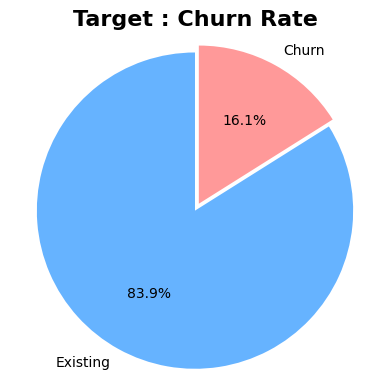

In [69]:
## Target 데이터 원형 그래프 시각화 ##
import matplotlib.pyplot as plt

# 데이터 준비
labels = ['Existing', 'Churn']
sizes = [exist_rate, churn_rate]
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.05)  # 이탈 고객 부분을 약간 분리

# 원형 그래프 생성
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Target : Churn Rate', fontsize=16, fontweight='bold')
plt.axis('equal')  # 원형으로 만들기
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
